In [32]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, DotProduct, WhiteKernel


from sklearn import metrics


In [33]:
dataset = pd.read_csv('Clean Data/dataset.csv').drop('Unnamed: 0', axis=1)
X = dataset.drop(columns=['return'])
y = dataset['return']

X_without_nlp = X.drop(['neg', 'neu', 'pos', 'compound', 'pos-neg'], axis=1)

X_nlp = X[['neg', 'neu', 'pos', 'compound', 'pos-neg']]

dataset

,log_returns_1,delta_volume_1,log_returns_2,delta_volume_2,log_returns_3,delta_volume_3,log_returns_4,delta_volume_4,log_returns_5,delta_volume_5,neg,neu,pos,compound,pos-neg,return
0,-0.018345,0.064765,0.008432,0.061197,0.004434,0.156634,0.015417,-0.230147,-0.024807,0.861232,0.011,0.887,0.103,1.0,0.092,-0.050334
1,0.000997,0.109639,0.011798,-0.357978,0.011361,0.323929,0.002025,-0.194095,-0.007156,0.295691,0.014,0.816,0.170,1.0,0.156,0.132749
2,-0.005202,-0.218232,0.014292,-0.127579,-0.017992,0.073071,-0.005681,0.174115,-0.011785,0.062320,0.014,0.846,0.140,1.0,0.126,0.009185
3,0.014541,-0.055087,-0.013210,-0.285129,-0.012329,0.584799,-0.010677,0.188588,-0.009175,-0.192189,0.021,0.855,0.124,1.0,0.103,0.082598
4,0.001062,0.196928,0.005147,-0.136284,0.025683,0.107471,0.007606,-0.026533,0.025431,-0.364440,0.015,0.883,0.102,1.0,0.087,0.101269
5,0.004693,-0.027201,0.008130,0.215549,0.013384,0.160918,-0.005422,-0.310688,0.022589,-0.094361,0.026,0.851,0.123,1.0,0.097,-0.033900
6,0.018725,0.275871,0.008600,0.274479,0.013238,0.076471,0.009587,0.059213,-0.000398,-0.233405,0.019,0.846,0.135,1.0,0.116,-0.094149
7,-0.032432,0.117353,0.030525,0.425235,0.015179,-0.003376,-0.000088,-0.146476,0.018093,0.645468,0.020,0.828,0.152,1.0,0.132,0.057059
8,-0.019716,-0.212856,0.051802,0.261476,-0.005076,-0.278884,0.001344,0.362545,-0.004850,-0.335023,0.022,0.848,0.131,1.0,0.109,-0.044649
9,-0.005693,-0.167784,-0.002740,0.067526,-0.010887,0.030757,0.002056,-0.054776,-0.005317,-0.467542,0.022,0.836,0.143,1.0,0.121,-0.105367


In [34]:
def eval_loocv(model, X, y):
    loo = LeaveOneOut()
    loo.get_n_splits(X)
    y_true = []
    y_pred = []
    for train_index, test_index in loo.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        y_true.append(y_test.values[0])
        y_pred.append(model.predict(X_test)[0])
    return np.sqrt(metrics.mean_squared_error(y_true, y_pred))

In [35]:
seed = 0

In [36]:

def ret_array(model):
    return [eval_loocv(model, X_without_nlp, y), eval_loocv(model, X_nlp, y), eval_loocv(model, X, y)]

results = pd.DataFrame()

results['Linear Regression'] = ret_array(LinearRegression())
print('completed Linear Regression')
results['Ridge'] = ret_array(Ridge(random_state=seed))
print('completed Ridge')
results['Lasso'] = ret_array(Lasso(random_state=seed))
print('completed Lasso')
results['Elastic Net'] = ret_array(ElasticNet(random_state=seed))
print('completed Elastic Net')
results['SVR'] = ret_array(SVR())
print('completed SVR')
results['KNN'] = ret_array(KNeighborsRegressor())
print('completed KNN')
results['Random Forest'] = ret_array(RandomForestRegressor(random_state=seed))
print('completed Random Forest')
results['MLP'] = ret_array(MLPRegressor(random_state=seed))
print('completed MLP')
kernel = 1.0 * RBF(1.0) + WhiteKernel()
results['Gaussian Process'] = ret_array(GaussianProcessRegressor(kernel=kernel, random_state=seed))
print('completed Gaussian Process')

results.index = ['NO NLP', 'NLP', 'BOTH']

results.to_csv('Clean Data/model_results.csv')



completed Linear Regression
completed Ridge
completed Lasso
completed Elastic Net
completed SVR
completed KNN
completed Random Forest
completed MLP


/Users/ryanshea/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/ryanshea/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/ryanshea/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a be

completed Gaussian Process


In [40]:
results

,Linear Regression,Ridge,Lasso,Elastic Net,SVR,KNN,Random Forest,MLP,Gaussian Process
NO NLP,0.100887,0.084308,0.082074,0.082074,0.081904,0.093319,0.082896,0.092664,0.083596
NLP,0.084574,0.082165,0.082074,0.082074,0.082549,0.095048,0.100046,0.106670,0.083811
BOTH,0.111167,0.084443,0.082074,0.082074,0.082800,0.093408,0.084481,0.090849,0.083596


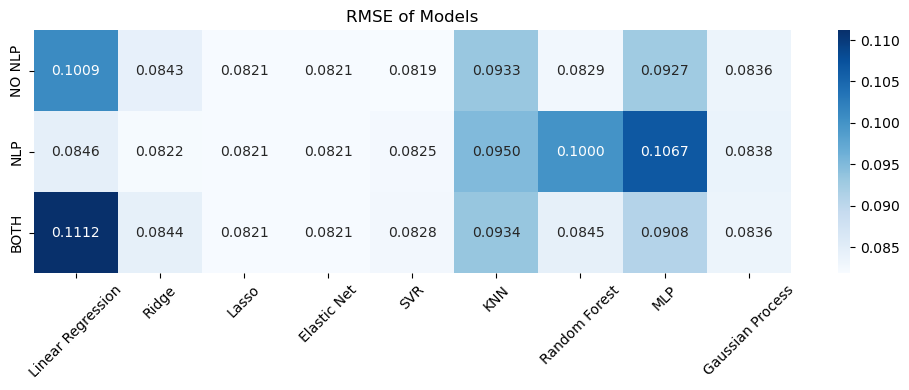

In [82]:
plt.figure(figsize=(10, 4))
sns.heatmap(results, annot=True, cmap='Blues', fmt='.4f')
plt.title('RMSE of Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('heatmap.png')
plt.show()


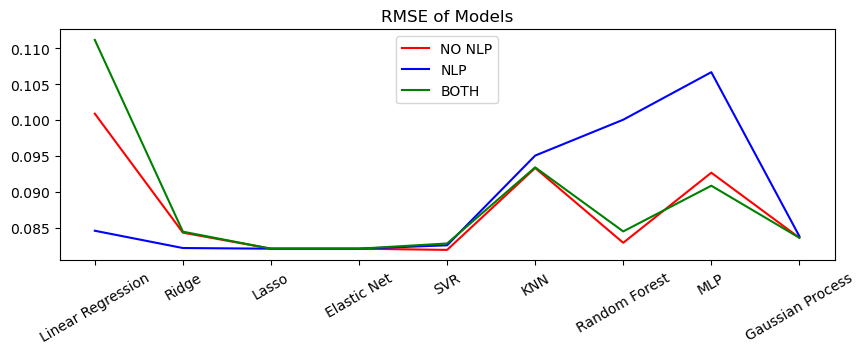

In [71]:
# another way to visualize the results
plt.figure(figsize=(10, 3))
plt.plot(results.columns, results.loc['NO NLP'], color='red', label='NO NLP')
plt.plot(results.columns, results.loc['NLP'], color='blue', label='NLP')
plt.plot(results.columns, results.loc['BOTH'], color='green', label='BOTH')
plt.legend()
plt.title('RMSE of Models')
plt.xticks(rotation=30)
# plt.tight_layout()
plt.savefig('lineplot.png')
plt.show()

In [53]:
means = results.mean(axis=1)
means

NO NLP    0.087080
NLP       0.088779
BOTH      0.088321
dtype: float64

In [99]:
# lasso coefficients
lasso = Lasso(random_state=seed)
lasso.fit(X, y)

print("        Lasso Regression")
print()
print(f"      Intercept: {lasso.intercept_:.6f}")
print()
for col, coef in zip(X.columns, lasso.coef_):
    print(f"{col:>15}: {coef:.6f}")

        Lasso Regression

      Intercept: 0.018800

  log_returns_1: 0.000000
 delta_volume_1: 0.000000
  log_returns_2: -0.000000
 delta_volume_2: -0.000000
  log_returns_3: 0.000000
 delta_volume_3: 0.000000
  log_returns_4: 0.000000
 delta_volume_4: -0.000000
  log_returns_5: -0.000000
 delta_volume_5: 0.000000
            neg: 0.000000
            neu: -0.000000
            pos: 0.000000
       compound: 0.000000
        pos-neg: 0.000000


In [100]:
# elastic net coefficients
elastic = ElasticNet(random_state=seed)
elastic.fit(X, y)

print("     Elastic Net Regression")
print()
print(f"      Intercept: {elastic.intercept_:.6f}")
print()
for col, coef in zip(X.columns, elastic.coef_):
    print(f"{col:>15}: {coef:.6f}")



     Elastic Net Regression

      Intercept: 0.018800

  log_returns_1: 0.000000
 delta_volume_1: 0.000000
  log_returns_2: -0.000000
 delta_volume_2: -0.000000
  log_returns_3: 0.000000
 delta_volume_3: 0.000000
  log_returns_4: 0.000000
 delta_volume_4: -0.000000
  log_returns_5: -0.000000
 delta_volume_5: 0.000000
            neg: 0.000000
            neu: -0.000000
            pos: 0.000000
       compound: 0.000000
        pos-neg: 0.000000


In [59]:
rf = RandomForestRegressor(random_state=seed)

# feature importance
rf.fit(X, y)
imp = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})
imp = imp.sort_values('importance', ascending=False)
imp


,feature,importance
2,log_returns_2,0.200427
3,delta_volume_2,0.154056
6,log_returns_4,0.132330
1,delta_volume_1,0.104437
9,delta_volume_5,0.085800
8,log_returns_5,0.064075
5,delta_volume_3,0.064035
0,log_returns_1,0.047563
4,log_returns_3,0.038807
12,pos,0.030860


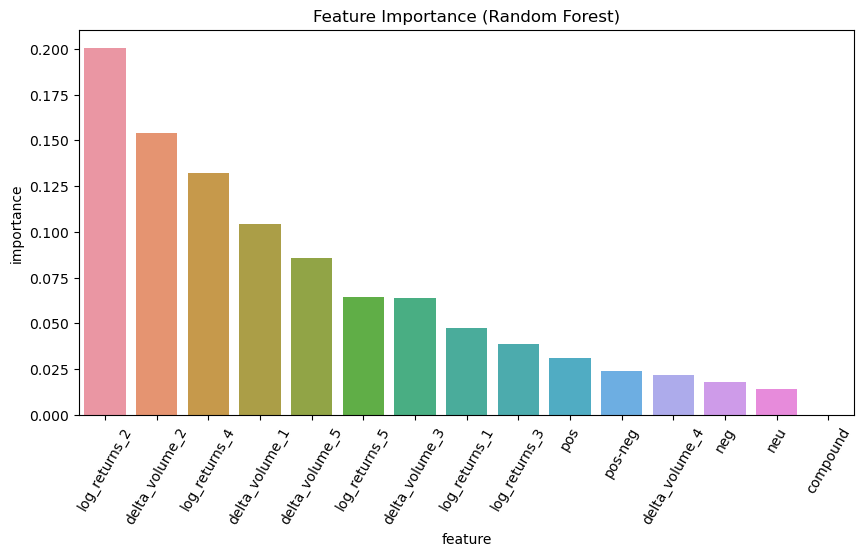

In [63]:
# visualize feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x='feature', y='importance', data=imp)
plt.xticks(rotation=60)
plt.title('Feature Importance (Random Forest)')
plt.savefig('feature_importance.png')
plt.show()